In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')


In [31]:
# Cargar el dataset
data = pd.read_csv('Mall_Customers.csv') 

In [35]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(60)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [37]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

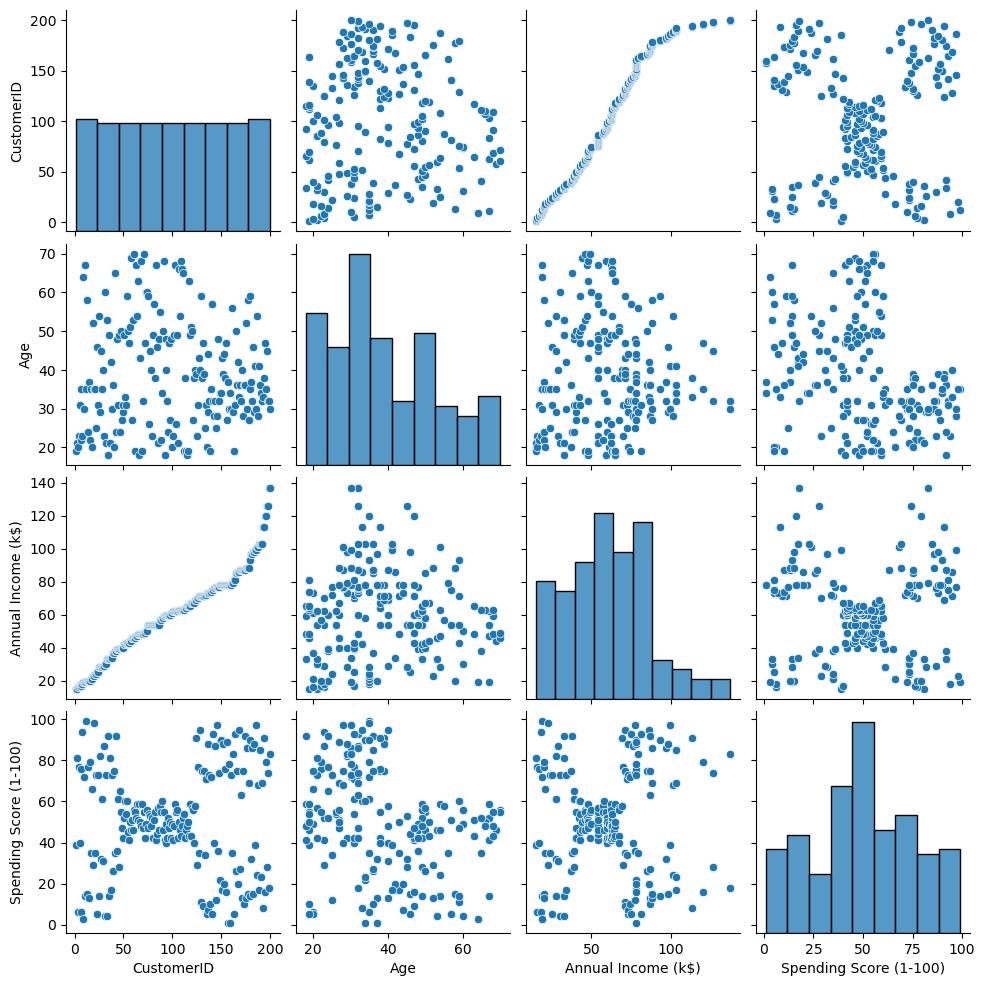

In [41]:
sns.pairplot(data)
plt.show()

In [43]:
data.dropna(inplace=True)  # Eliminar filas con valores nulos


In [45]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [47]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [49]:
selected_features = scaled_data  # Utilizamos las características escaladas

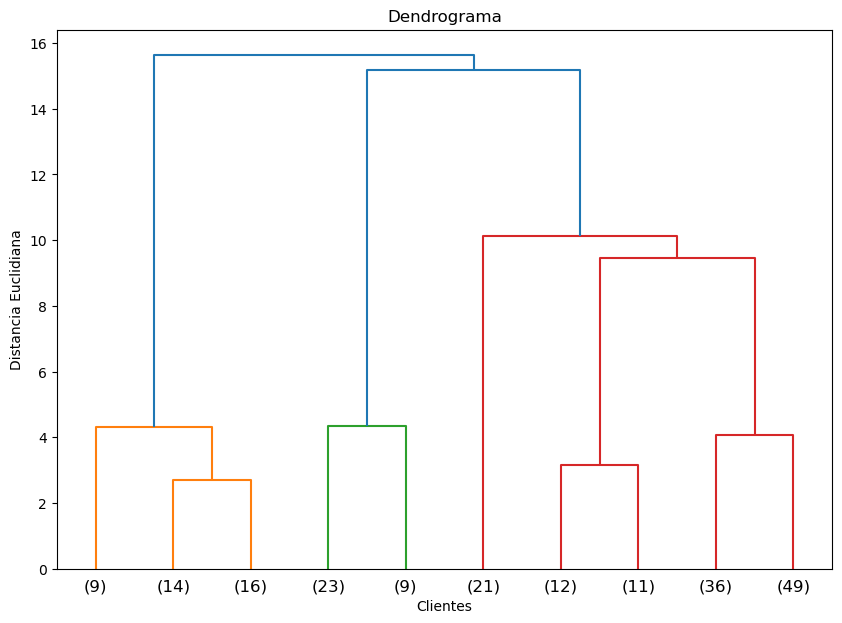

In [51]:
linked = linkage(selected_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [55]:
n_clusters = 8  # Número de clusters óptimo basado en el dendrograma
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels = model.fit_predict(selected_features)
data['Cluster'] = cluster_labels

In [57]:
silhouette_avg = silhouette_score(selected_features, cluster_labels)
calinski_harabasz = calinski_harabasz_score(selected_features, cluster_labels)
db_score = davies_bouldin_score(scaled_data, cluster_labels)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.4308617778221774
Índice de Calinski-Harabasz: 250.58829418554282
Índice de Davies-Bouldin: 0.7777411059944139


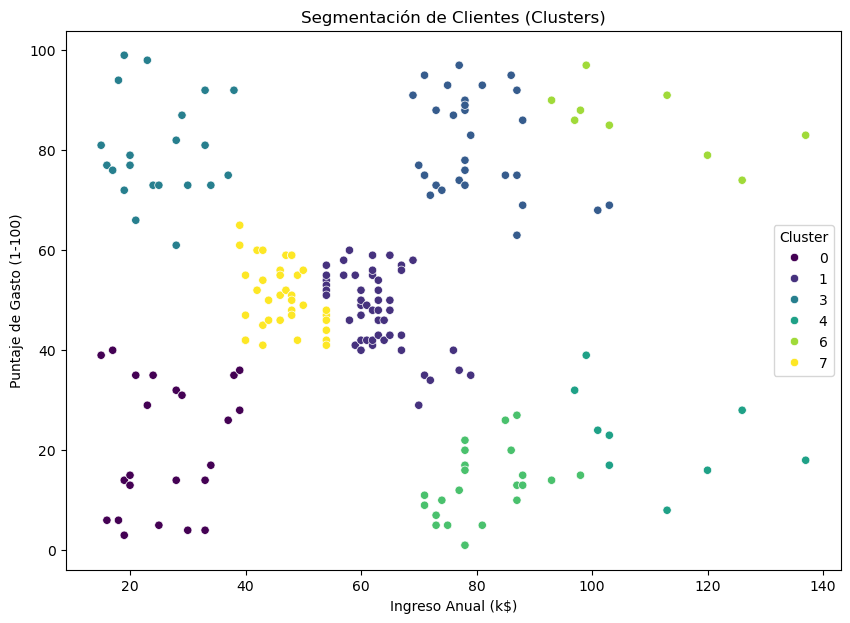

In [59]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis'
)
plt.title('Segmentación de Clientes (Clusters)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

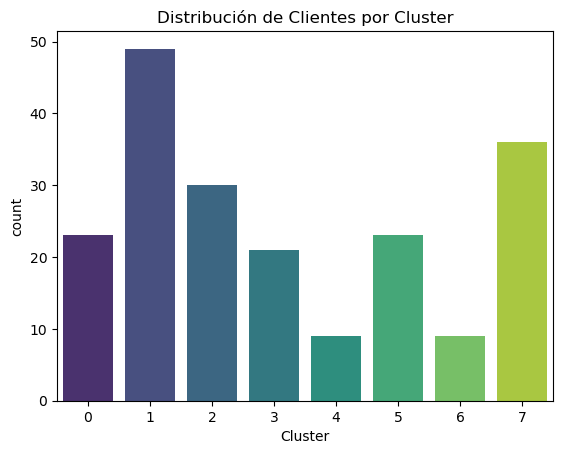

In [61]:
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title('Distribución de Clientes por Cluster')
plt.show()

In [63]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         23.000000  0.608696  45.217391           26.304348   
1        106.142857  0.612245  39.816327           62.734694   
2        153.600000  0.533333  32.600000           79.633333   
3         22.000000  0.571429  25.333333           25.095238   
4        190.777778  0.777778  40.444444          111.000000   
5        156.652174  0.304348  41.217391           80.956522   
6        190.000000  0.555556  33.000000          109.555556   
7         63.055556  0.583333  46.111111           46.388889   

         Spending Score (1-100)  
Cluster                          
0                     20.913043  
1                     48.020408  
2                     81.000000  
3                     80.047619  
4                     22.777778  
5                     12.782609  
6                     85.888889  
7                     50.638889  


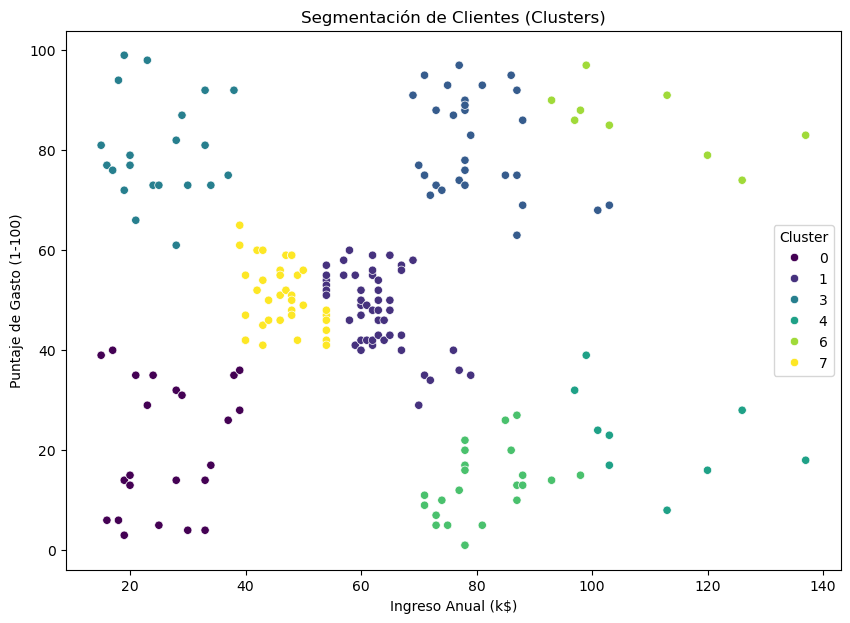

In [65]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis'
)
plt.title('Segmentación de Clientes (Clusters)')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.show()

In [ ]:


realizar una segmentación de clientes utilizando clustering jerárquico basado en el dataset de "Mall Customer Segmentation". Se emplearon tres métricas clave para evaluar la calidad del modelo: Coeficiente de Silhouette, Índice de Calinski-Harabasz e Índice de Davies-Bouldin.

-Número de n_clusters = 8  

-Características utilizadas: Ingreso Anual (Annual Income) y Puntaje de Gasto (Spending Score).

 coeficiente de silhouette 0.430861

Índice de Calinski-Harabasz: 250.58829

Índice de Davies-Bouldin: 0.777741

Análisis por Clusters

Se identificaron 8 clusters en función de los datos procesados. Los clusters representan diferentes perfiles de clientes según su capacidad de ingreso y su comportamiento de gasto.

1 Bajo Bajo Clientes con baja capacidad adquisitiva y gasto.

2 Medio Alto Clientes moderados con alta inclinación al gasto.

3 Alto Bajo Clientes con alta capacidad, pero bajo consumo.

4 Alto Alto Clientes premium: alto ingreso y alta disposición.

5 Bajo Alto Clientes jóvenes u ocasionales con gastos elevados.

Cluster 1: Clientes de menor ingreso con bajo gasto. Estrategia: Promociones de bajo costo o eventos locales para atraerlos.

Cluster 2: Ingreso moderado con alto gasto. Clientes leales con alto potencial de conversión en embajadores de marca. Estrategia: Ofrecer programas de fidelización.

Cluster 3: Clientes con ingresos altos, pero gasto bajo. Representan un desafío porque tienen capacidad adquisitiva, pero no consumen. Estrategia: Incentivos específicos para productos premium.

Cluster 4: Clientes de alto valor con altos ingresos y gastos. Representan el núcleo de consumidores importantes para el mall. Estrategia: Personalización, membresías VIP y experiencias exclusivas.

Cluster 5: Clientes de ingresos bajos, pero con alto gasto. Pueden ser jóvenes o compradores impulsivos. Estrategia: Crear experiencias que fortalezcan la lealtad y el engagement.

Cluster 6:Ingreso moderado con alto gasto. Clientes leales con alto potencial de conversión en embajadores de marca. Estrategia: Ofrecer programas de fidelización.

Cluster 7: Clientes de alto valor con altos ingresos y gastos. Representan el núcleo de consumidores importantes para el mall. Estrategia: Personalización, membresías VIP y experiencias exclusivas.

Cluster 8:Clientes de ingresos bajos, pero con alto gasto. Pueden ser jóvenes o compradores impulsivos. Estrategia: Crear experiencias que fortalezcan la lealtad y el engagement.